<a href="https://colab.research.google.com/github/prajwal-kotian/Natural-Language-Processing/blob/master/YouAin'tSarcastic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q sklearn

In [0]:
#import statements
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [0]:
# Keeping the Hyper parameters aside for tweeking the values in order to gain higer accuracy
vocab_size = 10000
oov_tok = '<new data>'
max_len = 100
pad_type = 'post'
trunc_type = 'post'
embed_dim = 16

In [0]:
# importing data from the dataset and labelling it
import json
with open ("Sarcasm_Headlines_Dataset.json", 'r') as f:
  users = [json.loads(line) for line in f]
sentence = []
label= []
for item in users:
  sentence.append(item['headline'])
  label.append(item['is_sarcastic'])
print(len(sentence))
training_size = int(len(sentence)/2)
print(training_size)


26709
13354


In [0]:
#dividing the data into test set and training set
training_sentences = sentence[0:training_size]
training_labels = np.array(label[0:training_size])
test_sentences = sentence[training_size:26000]
test_labels = np.array(label[training_size:26000])


In [0]:
#tokenizing the words in the traing and testing data
token = Tokenizer(num_words= vocab_size, oov_token = oov_tok)
token.fit_on_texts(training_sentences)
training_sequence = np.array(pad_sequences(token.texts_to_sequences((training_sentences)), maxlen = max_len  , padding = pad_type, truncating = trunc_type))
testing_sequence = np.array (pad_sequences(token.texts_to_sequences((test_sentences)), maxlen = max_len , padding = pad_type, truncating= trunc_type ))
voc_size = training_sequence.max()+1

In [0]:
#creating a keras model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(voc_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
#compiling the mode;
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(training_sequence , training_labels, epochs = 5,validation_data=(testing_sequence, test_labels), verbose=2 )
result = model.evaluate(testing_sequence, test_labels)

Epoch 1/5
418/418 - 91s - loss: 0.4197 - accuracy: 0.7941 - val_loss: 0.3372 - val_accuracy: 0.8470
Epoch 2/5
418/418 - 90s - loss: 0.1927 - accuracy: 0.9251 - val_loss: 0.3676 - val_accuracy: 0.8416
Epoch 3/5
418/418 - 90s - loss: 0.0947 - accuracy: 0.9665 - val_loss: 0.4796 - val_accuracy: 0.8369
Epoch 4/5
418/418 - 90s - loss: 0.0487 - accuracy: 0.9846 - val_loss: 0.5331 - val_accuracy: 0.8343
Epoch 5/5
418/418 - 90s - loss: 0.0260 - accuracy: 0.9915 - val_loss: 0.7803 - val_accuracy: 0.8245
396/396 [==============================] - 16s 40ms/step - loss: 0.7803 - accuracy: 0.8245


In [0]:
#Reversing the tokens so we can read the sentences that are tokenized
word_index = token.word_index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_sequence[0]))
print(training_sentences[0])
print(training_labels[0])

former versace store clerk sues over secret 'black code' for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
former versace store clerk sues over secret 'black code' for minority shoppers
0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The handle 'u' has a label of '_' which cannot be automatically added to the legend.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-

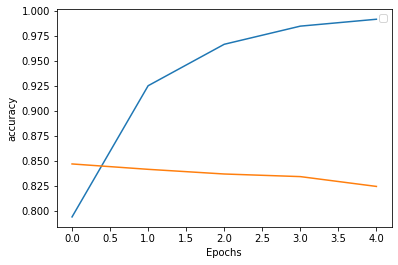

In [0]:
#plotting the accuracy of training data vs testing data
import matplotlib.pyplot as plt
def plot (history , string ):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend(string ,'val_'+ string)
  plt.show

plot(history , 'accuracy')



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The handle 's' has a label of '_' which cannot be automatically added to the legend.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-

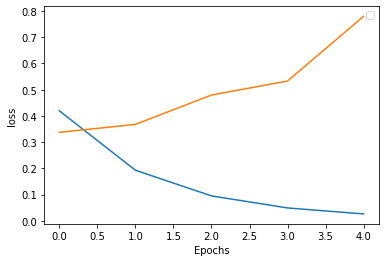

In [0]:
#plotting the training vs testing loss
plot(history, 'loss')

In [0]:
# the next three blocks are to gain a vector diagram of the associative words
e = model.layers[0]
weight = e.get_weights()[0]
print(weight.shape)

(10000, 64)


In [0]:
import io

out_v = io.open('vec.tsv', 'w',encoding = 'utf8')
out_m = io.open('meta.tsv', 'w',encoding = 'utf8')
for word_num in range(1,voc_size):
  word = reverse_word_index[word_num]
  embedding = weight[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embedding]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vec.tsv')
  files.download('meta.tsv')

In [0]:
# predictions
i = int(input('Enter the serial number of the headline '))


sent = [sentence[i]]
print(sentence [i])
print(label[i])
sequences = token.texts_to_sequences(sent)
padded = pad_sequences(sequences, maxlen=max_len, padding='post')

predict = (model.predict(padded))
if predict > 0.5:
  print('Can I be more sarcastic?')
else:
  print ('That\'s not how sarcasm works')





